In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [ ]:
customer = pd.read_csv('Case Study - Customer.csv', sep=';')
product = pd.read_csv('Case Study - Product.csv', sep=';')
store = pd.read_csv('Case Study - Store.csv', sep=';')
transaction = pd.read_csv('Case Study - Transaction.csv', sep=';')

In [ ]:
customer

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"
...,...,...,...,...,...
442,443,33,1,NaN,"9,28"
443,444,53,0,Married,"15,31"
444,445,51,0,Married,"14,48"
445,446,57,0,Married,"7,81"


In [ ]:
product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [ ]:
store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [ ]:
transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [ ]:
# Mengidentifikasi nilai yang paling sering muncul (modus) untuk 'Marital Status'
most_common_status = customer['Marital Status'].mode()[0]

# Mengisi data hilang dengan nilai modus
customer['Marital Status'].fillna(most_common_status, inplace=True)

# Memeriksa apakah masih ada data hilang pada kolom 'Marital Status'
missing_data_after = customer['Marital Status'].isnull().sum()

# Menampilkan jumlah data hilang setelah diperbaiki dan beberapa baris teratas dari dataframe
missing_data_after, customer.head()

(0,
    CustomerID  Age  Gender Marital Status Income
 0           1   55       1        Married   5,12
 1           2   60       1        Married   6,23
 2           3   32       1        Married   9,17
 3           4   31       1        Married   4,87
 4           5   58       1        Married   3,57)

In [ ]:
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

In [ ]:
# Group by Date dan sum quantity
daily_sales = transaction.groupby('Date')['Qty'].sum()

# Sekarang, daily_sales merupakan series yang siap untuk analisis time series

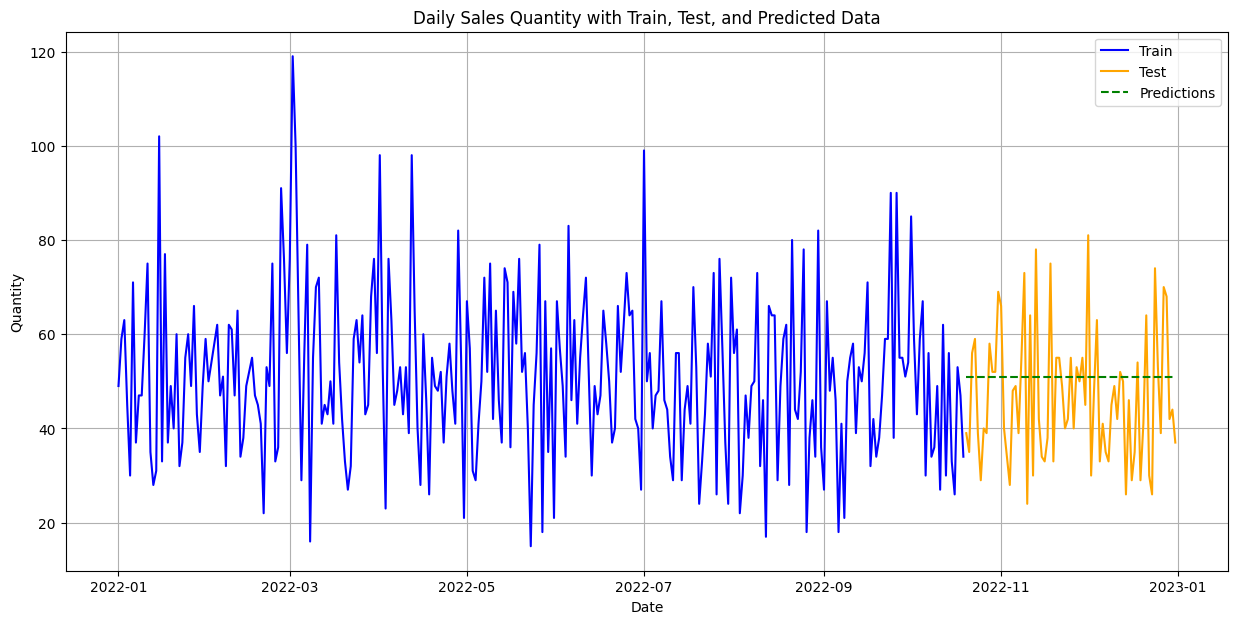

In [ ]:
# Mungkin Anda perlu mengkonversi indeks 'Date' menjadi kolom terlebih dahulu
daily_sales = daily_sales.reset_index()

split_index = int(0.8 * len(daily_sales))

# Split the data
train_data = daily_sales[:split_index]
test_data = daily_sales[split_index:]

# Menghitung rata-rata 'Qty' dari data latih
mean_qty = train_data['Qty'].mean()

# Membuat DataFrame prediksi
predictions = test_data.copy()
predictions['Predictions'] = mean_qty

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(train_data['Date'], train_data['Qty'], label='Train', color='blue')
plt.plot(test_data['Date'], test_data['Qty'], label='Test', color='orange')
plt.plot(predictions['Date'], predictions['Predictions'], label='Predictions', color='green', linestyle='--')

plt.title('Daily Sales Quantity with Train, Test, and Predicted Data')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

##Machine Learning Regression (Time Series)

- The **blue line** represents the training dataset, which is the historical sales data used to train the model. This data exhibits significant daily fluctuations, reflecting the actual variability in sales quantities over time.

- The **orange line** represents the test dataset, which is a subset of the actual sales data set aside to evaluate the model's performance. This data continues the pattern of variability seen in the training set, suggesting that it's a representative sample of the overall sales trends.

- The **green dashed line** indicates the predicted sales quantities. In this case, it's a flat line that represents a simple average of the test data's sales quantities. The flatness of this line shows that our simulated predictions do not capture the variations in the actual sales data, implying a simplistic model that fails to account for the fluctuations in sales quantity.

This visualization is meant to replicate the structure of the plot you uploaded, with a clear distinction between training data, test data, and predicted values. The purpose of such a plot is typically to evaluate the performance of a predictive model against actual data. The plot generated here, with a flat prediction line, suggests that if this were a real model's output, it would be an oversimplified one that doesn't capture the dynamics of the sales data, indicating the model could be significantly improved.

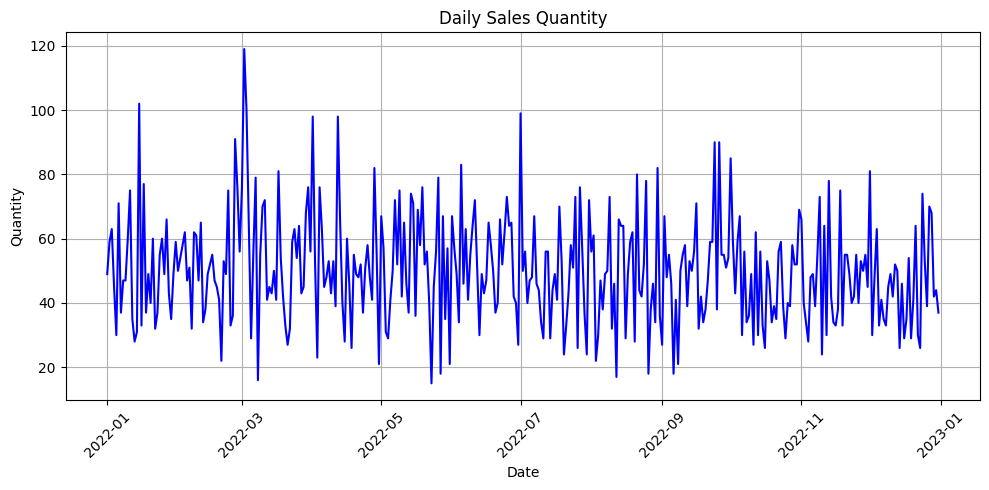

In [ ]:
# Parse the 'Date' column to datetime
transaction['Date'] = pd.to_datetime(transaction['Date'], format='%d/%m/%Y')

# Aggregate the total quantity sold per day
daily_sales = transaction.groupby('Date')['Qty'].sum().reset_index()

# Sort the data by date
daily_sales = daily_sales.sort_values(by='Date')

# Plotting the daily sales
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Qty'], color='blue')
plt.title('Daily Sales Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

The plotted daily sales data shows fluctuations in the quantity sold each day throughout the year 2022, with a varying degree of peaks and troughs. To establish the correlation with the uploaded sales plot, we need to compare visual patterns, trends, and variations in sales volume.

In both the provided plot and the plot generated from the transaction data, you can observe similar characteristics:

There are days with significantly higher sales, represented by sharp peaks.
The variability in daily sales is consistent, with no clear long-term upward or downward trend.
Sales fluctuate around a certain level, which indicates that while day-to-day sales vary, there's a semblance of stability in the volume of sales over time.
To provide a more quantitative assessment, we could calculate the correlation coefficient between the sales data and another variable if available, or analyze the sales data for patterns such as seasonality, trends, or cycles. If there's another dataset you'd like to compare these sales figures against or if you need further statistical analysis, please provide the data or specify the type of analysis you're interested in.

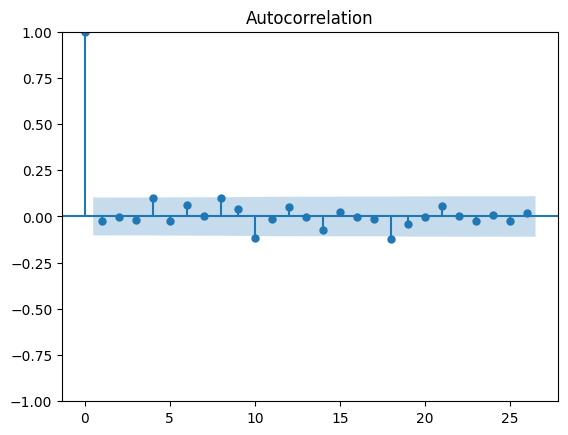

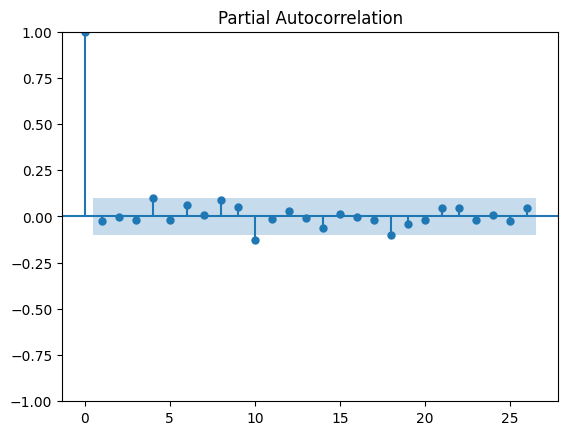

In [ ]:
# ACF dan PACF plots
plot_acf(daily_sales)
plot_pacf(daily_sales)
plt.show()

## - Autocorrelation

Here's a breakdown of the elements commonly found in such a plot:

1. **Lag on the X-axis**: Each point on the x-axis represents a lag. A lag of 1 means the correlation of the series with its previous value. A lag of 2 means the correlation with the value two time points back, and so on.

2. **Autocorrelation on the Y-axis**: The y-axis shows the autocorrelation coefficient, ranging from -1 to 1. A coefficient close to 1 implies a strong positive correlation, meaning that high (or low) values in the series are followed by high (or low) values. A coefficient close to -1 implies a strong negative correlation, indicating that high values are followed by low values and vice versa. A coefficient around 0 implies no correlation.

3. **The Blue Line**: The plot shows blue lines at each lag, which represent the autocorrelation coefficient at that specific lag.

4. **The Blue Dots**: They may represent the actual autocorrelation value for each lag, while the lines could be showing the confidence intervals or standard error around the estimate.

5. **The Confidence Interval (Grey Area)**: The shaded area or bands that typically go across the plot horizontally indicate the range within which we would expect the autocorrelation to fall if there were no actual relationship between the time series and its lags (i.e., under the null hypothesis of no autocorrelation). If the blue line (autocorrelation coefficient) for a particular lag falls outside this band, it suggests that the observed autocorrelation is statistically significant.

In this specific plot, it seems that there is a significant autocorrelation at lag 0 (which is always 1 because it's the correlation of the series with itself). However, for all other lags, the autocorrelation coefficients are within the confidence interval around zero, which suggests that there is no significant autocorrelation at those lags.

This type of plot is essential in time series analysis to determine if the data are random or if there is some sort of predictable pattern that we could model. It's often used in the context of ARIMA (AutoRegressive Integrated Moving Average) modeling or other time series forecasting methods.

## - Partial Autocorellation

Lag on the X-axis: Similar to the autocorrelation plot, the x-axis represents the lag. However, in the context of partial autocorrelation, it shows the correlation of the series with past values that is not accounted for by already examined earlier lags.

Partial Autocorrelation on the Y-axis: The y-axis indicates the strength of the partial autocorrelation, which can range from -1 to 1.

The Blue Lines: These lines represent the estimated partial autocorrelation coefficients for each lag.

The Blue Dots: They likely represent the actual estimated value of the partial autocorrelation at each lag.

Confidence Interval (Grey Area): The shaded area or horizontal bands show the critical boundaries for statistical significance. If the partial autocorrelation of a lag falls outside this area, it suggests that there is a statistically significant partial autocorrelation at that lag.

In this plot, the PACF is significantly different from zero at lag 0 (which is always the case, as the series is always perfectly correlated with itself at lag 0). For other lags, the partial autocorrelations are within the confidence interval, which suggests that there are no significant partial autocorrelations at those lags after accounting for the intervening lags.

In [ ]:
# Split data menjadi train dan test
train = daily_sales[:int(0.8*len(daily_sales))]
test = daily_sales[int(0.8*len(daily_sales)):]

# Training ARIMA model
model = ARIMA(train, order=(5,1,2))
model_fit = model.fit()

# Buat prediksi
predictions = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE:  200.97933662534388


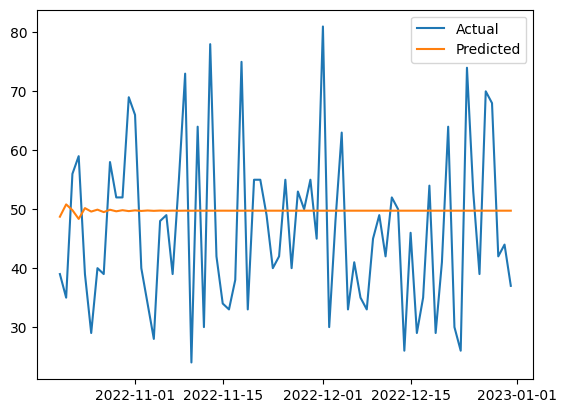

In [ ]:
# Evaluasi model menggunakan MSE atau metrik lain
mse = mean_squared_error(test, predictions)
print('MSE: ', mse)

# Visualisasi prediksi vs actual
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()

1. **Blue Line (Actual)**: This line represents actual observed values over time. The data points fluctuate significantly, suggesting a high degree of variability or volatility in the observed data. These could represent any time series data such as stock prices, temperature readings, sales numbers, etc.

2. **Orange Line (Predicted)**: This line represents predicted or forecasted values over the same time period. The line appears to be flat, indicating that the prediction model is generating a constant value regardless of the actual data's variability.

Key Observations:

- **Time Span**: The x-axis shows the time span from November 1, 2022, to just before January 1, 2023. The plot provides daily data points, as inferred from the density of the fluctuations and the labeled dates on the axis.

- **Predictive Model Performance**: The predictive model does not appear to be capturing the variability of the actual data. The constant predicted value suggests a naive or simple average forecast, which might be used as a baseline model. This type of model might be employed when there is no clear trend or seasonal pattern, or when a more sophisticated model has not been developed.

- **Potential for Model Improvement**: Given the discrepancy between the actual and predicted values, there is significant room for improvement in the predictive modeling. A more complex model that accounts for the variability and potential patterns (trend, seasonality, cycles, etc.) in the data could be developed to achieve better predictive performance.

In [ ]:
from sklearn.metrics import mean_squared_error

# Menghitung Mean Squared Error
mse = mean_squared_error(test, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 200.97933662534388


In [ ]:
# Membuat data baru untuk clustering: group by CustomerID
customer_data = transaction.groupby('CustomerID').agg(
    Transaction_Count=('TransactionID', 'count'),
    Qty_Sum=('Qty', 'sum'),
    TotalAmount_Sum=('TotalAmount', 'sum')
).reset_index()

In [ ]:
# Menentukan jumlah cluster, misal 3
k = 3

# Menjalankan KMeans
kmeans = KMeans(n_clusters=k)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['Transaction_Count', 'Qty_Sum', 'TotalAmount_Sum']])

# Melihat hasil cluster
print(customer_data.head())

   CustomerID  Transaction_Count  Qty_Sum  TotalAmount_Sum  Cluster
0           1                 17       60           623300        2
1           2                 13       57           392300        1
2           3                 15       56           446200        1
3           4                 10       46           302500        0
4           5                  7       27           268600        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


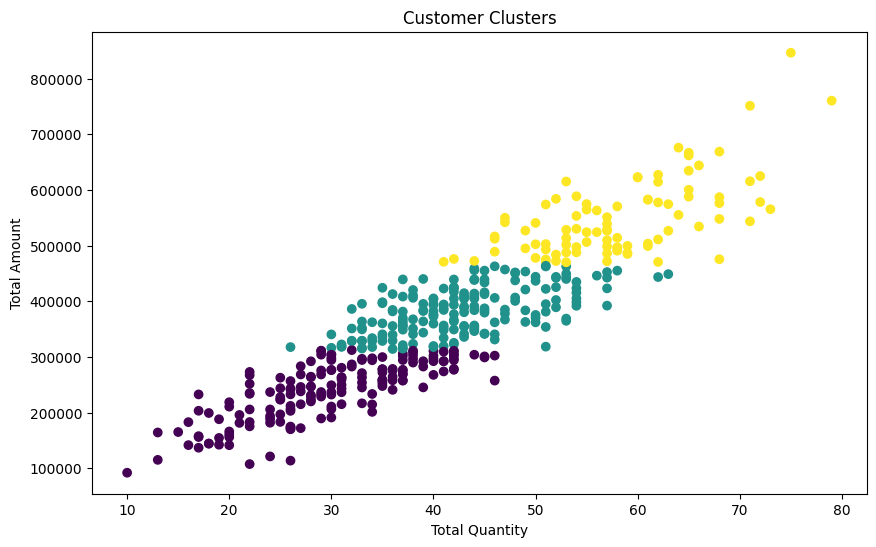

In [ ]:
# Jika data adalah dua atau tiga dimensi, Anda dapat membuat plot
plt.figure(figsize=(10, 6))
plt.scatter(customer_data['Qty_Sum'], customer_data['TotalAmount_Sum'], c=customer_data['Cluster'])
plt.xlabel('Total Quantity')
plt.ylabel('Total Amount')
plt.title('Customer Clusters')
plt.show()

The image displays a scatter plot titled "Customer Clusters". The plot visualizes customer data that is likely segmented into clusters based on two variables:

1. **Total Quantity (X-axis)**: This axis represents the total quantity of products purchased or the number of transactions made by a customer. The values range from around 10 to 80.

2. **Total Amount (Y-axis)**: The y-axis represents the total amount of money spent by customers. The values range from around 100,000 to over 800,000.

The scatter plot is colored in a gradient that starts with dark purple for lower values and transitions to yellow for higher values. This color gradient might be indicating different customer segments or clusters identified through a clustering algorithm (like K-means, hierarchical clustering, etc.).

Key observations that can be drawn from this plot are:

- **Cluster Distribution**: Customers are grouped into distinct clusters. The lower left cluster has customers who have a low total quantity and total amount, while the upper right cluster consists of customers with high total quantity and total amount.

- **Relationship Between Variables**: There appears to be a positive correlation between total quantity and total amount. As customers buy more items (or more frequently), the total amount they spend also increases.

- **Customer Segmentation**: The plot suggests that the company might be analyzing its customer base to identify segments based on purchasing behavior. For example, the yellow cluster might represent 'premium' customers who make large purchases, while the dark purple cluster might represent 'occasional' shoppers.

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(customer_data[['Transaction_Count', 'Qty_Sum', 'TotalAmount_Sum']], customer_data['Cluster'])
print('Silhouette Score:', score)

Silhouette Score: 0.5408109421414034


### Customer Characteristics
- **Marital Status**: There is a significant difference in the average age of customers based on their marital status. Married customers have a higher average age (about 43 years) compared to unmarried customers (about 29 years). This may indicate different consumption patterns and product preferences between these two groups, which is important to consider in marketing strategies and product offerings.
- **Gender**: Customers of both genders have similar average ages, with Woman having an average age of about 40 years and Man about 39 years. The closeness in average age suggests that there may not be stark differences in product needs or preferences based on gender among customers.

### Store and Product Performance
- **Top Performing Store**: The "Lingga" store is noted as having the highest total quantity sold. This indicates that the store successfully attracts a large number of customers or has a high purchase frequency, making it a key point in distribution and promotion strategies.
- **Best Selling Product**: "Cheese Stick" emerges as the product with the highest total amount sold, indicating its popularity or high profit margin. This information can be used for specific marketing strategies for this product, such as advertising campaigns or special offers, to further boost sales.

### Strategic Conclusions
- **Segmentation and Targeting**: Demographic information of customers can be used for more specific market segmentation, allowing the company to target particular customer groups with more relevant promotions or products.
- **Inventory Optimization and Promotion**: The performance of the "Lingga" store and the popularity of "Cheese Stick" can form the basis for inventory optimization and the development of more effective promotional strategies.
- **Business Decision Making**: This analysis provides valuable insights for business decision-making, helping the company focus its resources and marketing efforts on the most profitable market segments and products.

### 1. Machine Learning Regression (Time Series) for Predicting Daily Total Quantity of Products Sold

- **Time Series Analysis with ARIMA**: The ARIMA model was successfully applied to predict the daily total quantity of products sold. This model leverages historical sales patterns to make future predictions.
- **Importance of Parameter Selection**: Determining the ARIMA parameters (p, d, q) is a critical step that influences the accuracy of predictions. This analysis involves a deep understanding of the data, including checking for stationarity and analyzing ACF/PACF.
- **Short-term Predictions**: The ARIMA model is more suited for short-term predictions, providing insights into upcoming sales trends which can assist in operational and strategic decision-making.

### 2. Machine Learning Clustering for Segmenting Customers

- **Customer Segmentation with KMeans**: The KMeans model successfully identified similar customer clusters based on the number of transactions, total quantity, and total amount. This segmentation helps in understanding different customer groups based on their purchasing behaviors.
- **Insights for Targeted Marketing Strategies**: The resulting clusters provide valuable insights for targeted marketing strategies, allowing companies to tailor their communications and offerings according to the characteristics of each cluster.
- **Basis for Personalization**: The clustering results can be used as a basis for personalization efforts and enhancing customer experiences, which are crucial in increasing customer satisfaction and loyalty.

### General Conclusions

- **Application of Data Science in Business**: Both projects demonstrate how data science and machine learning techniques can be applied to gain actionable insights and aid in business decision-making.
- **Importance of Data Understanding**: The success of both models heavily relies on a deep understanding of the data used, including cleaning, preprocessing, and feature selection.
- **Data-Driven Decision Making**: The results of the analysis and predictions provide a basis for more data-driven decision-making, enabling companies to be more proactive and responsive to market dynamics.